# SE42 Foundations of Data Science - Data Science Salary Analysis

**Name:** Jona Schwarz

**Motivation and Goal**: This analysis aims to explore the salary in different areas of data science worldwide in the recent years. Due to my interest in the field and a possible carrer, I would like to explore the factors which influence compensation, as well as the development over the years.

**Research Questions**
* How do experience levels impact data science salaries?
* How have the salaries in data science evolved from 2020 - 2024?
* Which job titles relate to the highest salary?
* How has the remote ration changed between 2020 - 2024?
* What is the relationship between company size and compensation?

**Dataset**: "Data Science Salaries 2024" from Kaggle is the dataset underlying the analysis
* https://www.kaggle.com/datasets/yusufdelikkaya/datascience-salaries-2024/data

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimpy import skim

df = pd.read_csv("DataScience_salaries_2024.csv")

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14838  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ work_year       │   0 │     0 │    2023 │  0.7008 │   2020 │    2023 │   2023 │   2024 │     2024 │    ▂▇▅ │  │
│ │ salary          │   0 │     0 │  165000 │  356200 │  14000 │  102100 │ 142200 │ 187500 │ 30400000 │   ▇    │  │
│ │ salary_in_usd   │   0 │     0 │  149900 │   69010 │  15000 │  102000 │ 141300 │ 185900 │   800000 │  ▇▆▁   │  │
│ │ remote_ratio    │   0 │     0 │   32.76 │   46.49 │      0 │       0 │      0 │    100 │      100 │ ▇    ▃ │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                14838 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                14838 │  │
│ │ job_title                          │      0 │         0 │                       2.2 │                33024 │  │
│ │ salary_currency                    │      0 │         0 │                         1 │                14838 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                14838 │  │
│ │ company_location                   │      0 │         0 │                         1 │                14838 │  │
│ │ company_size                       │      0 │         0 │                         1 │                14838 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**Figure X:** Info on the dataset

# Correlation Matrix




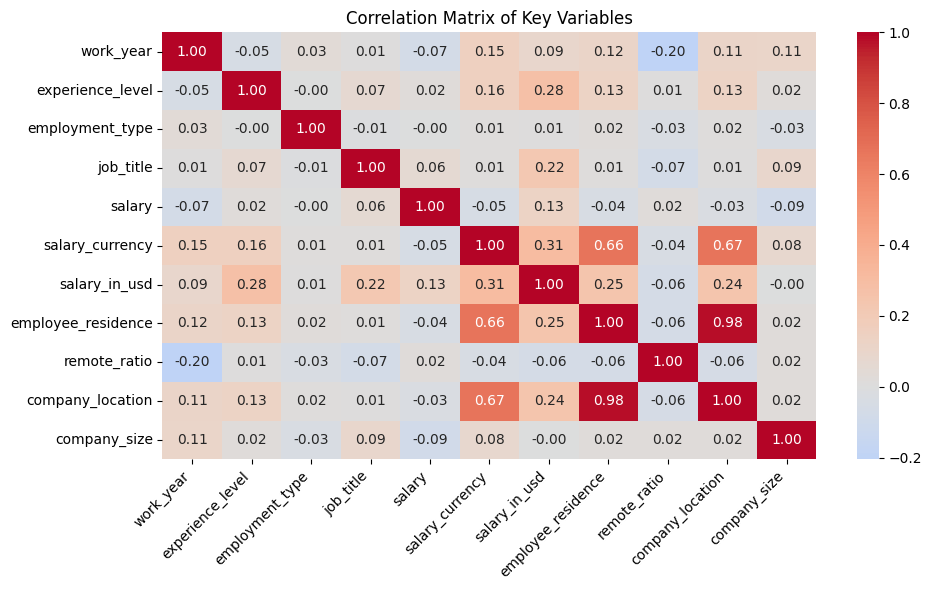

In [2]:
df_encoded = df.copy()
categorical_columns = ['experience_level', 'employment_type', 'job_title', 
                      'employee_residence', 'company_location', 'company_size',
                      'salary_currency']
for column in categorical_columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()

**Figure X**: Correlation heatmap showing the relationships between the variables in the dataset. The strength of the correlation can be derived by the numerical value as well as the color (red showing positive, blue showing negative correlations ).

Following correlations stand out:
* employee residence and company location
* employee residence and salary currency
* salary currency and company location

However, those are not really meaningful, because naturally the residence of the employee will correlate to the location of the company and the currency of the salary. The same applies to the currency of the salary and the location of the company. Of course there are cases where this does not apply e.g. working remotely etc..

Interesting correlations on the second look:
* experience level and salary in usd
* job title and salary in usd
* work year and remote ratio

# Salary by experience level

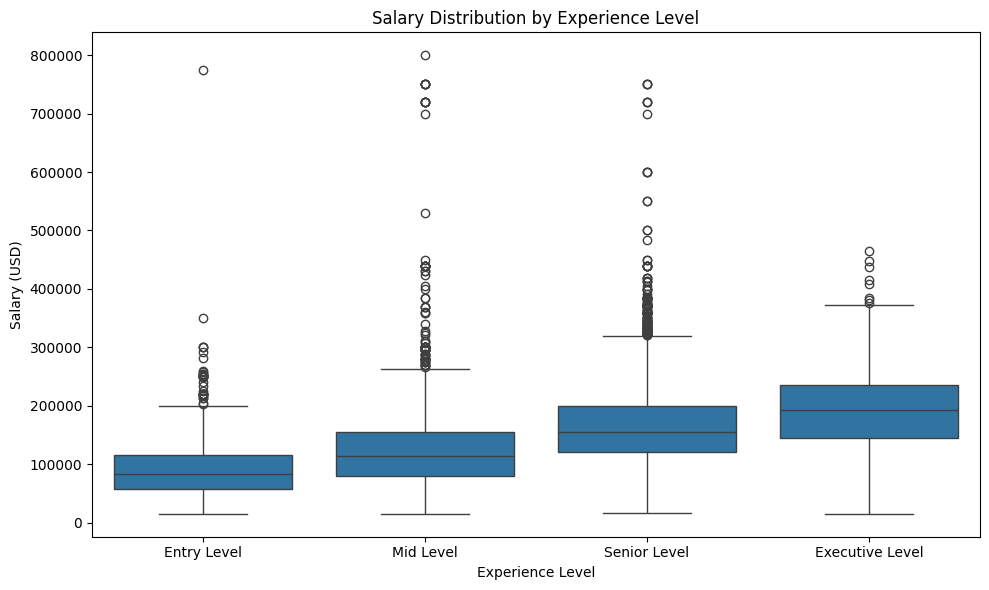

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(ticks=['EN', 'MI', 'SE', 'EX'], labels=['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level'], rotation=0)
plt.tight_layout()

**Figure X:** Box plot illustrating the salary distributions across various experience levels. The median salary is represented by the central line, while the box boundaries denote the first and third quartiles. The remaining distribution is indicated by the whiskers, with outliers represented by points beyond the whiskers.

The plot reveals a noticeable progression in the median salary as seniority increases. Mid and Senior level positions exhibit a wider range of salaries compared to Entry and Executive level positions, which display a more concentrated distribution. Notably, despite the lower median salary, some salaries within the Entry and Mid level positions surpass those in the Mid and Senior level.


# Salary Trends by Experience Level

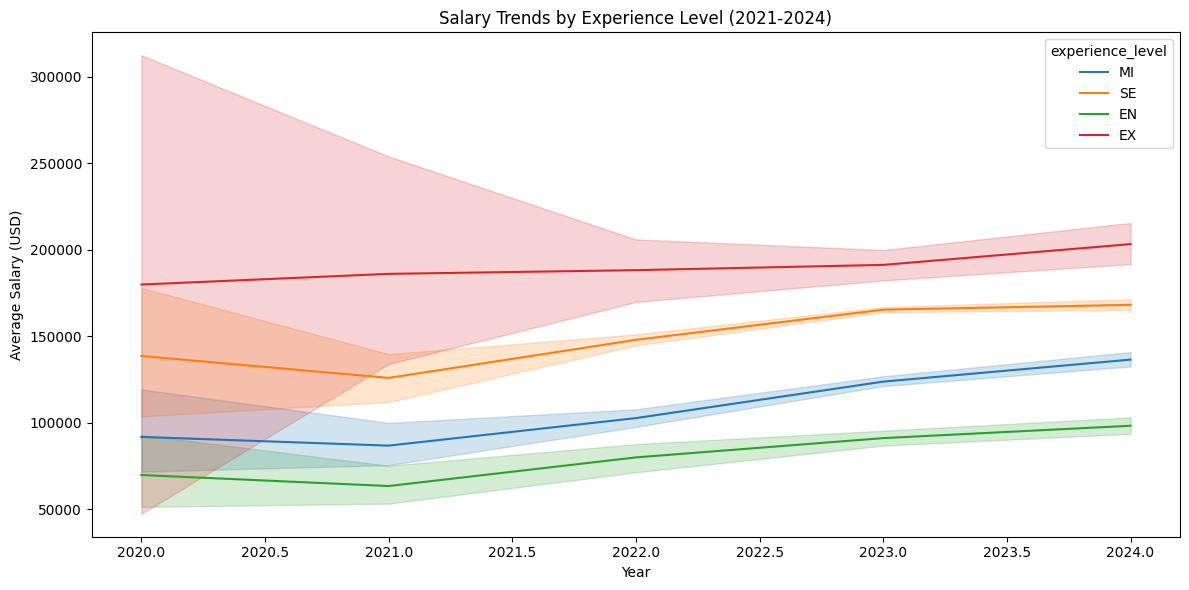

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue="experience_level")
plt.title('Salary Trends by Experience Level (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()

**Figure X**: Line plot showing the salary trends for different experience levels from 2021-2024. The shaded area around the line indicates a 95% confidence interval of the estimated average salary.

The salaries for Entry, Mid and Senior level show a negative growth until 2021 and then shift to a positive growth until year to date. Executive level salaries show a more consistent growth. The confidence interval (represented by the shaded area around the line) narrows progressively from 2020 to 2024, indicating an increasing amount of data points.

# Highest Salaries by Job Title

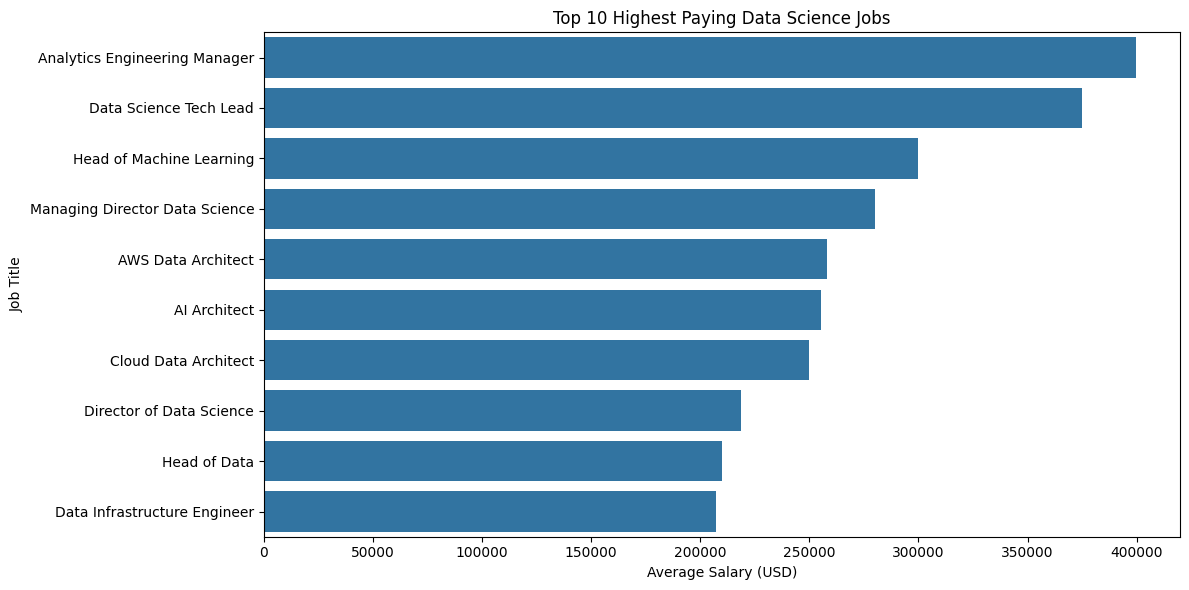

In [5]:
highest_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_salaries.values, y=highest_salaries.index)
plt.title('Top 10 Highest Paying Data Science Jobs')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()

**Figure X**: Bar chart illustrating the top 10 highest-paying data science job titles. The x-axis denotes the average annual salary in US dollars, while the y-axis represents the job titles.

Data analysis reveals that “Analytics Engineering Manager” holds the position of highest remuneration, with an average annual salary of approximately $400,000 USD. “Data Science Tech Lead” follows in second place, earning an average annual salary of approximately $375,000 USD. “Head of Machine Learning” completes the top three, with an average annual salary of approximately $300,000 USD.


# Remote Ratio by Work Year

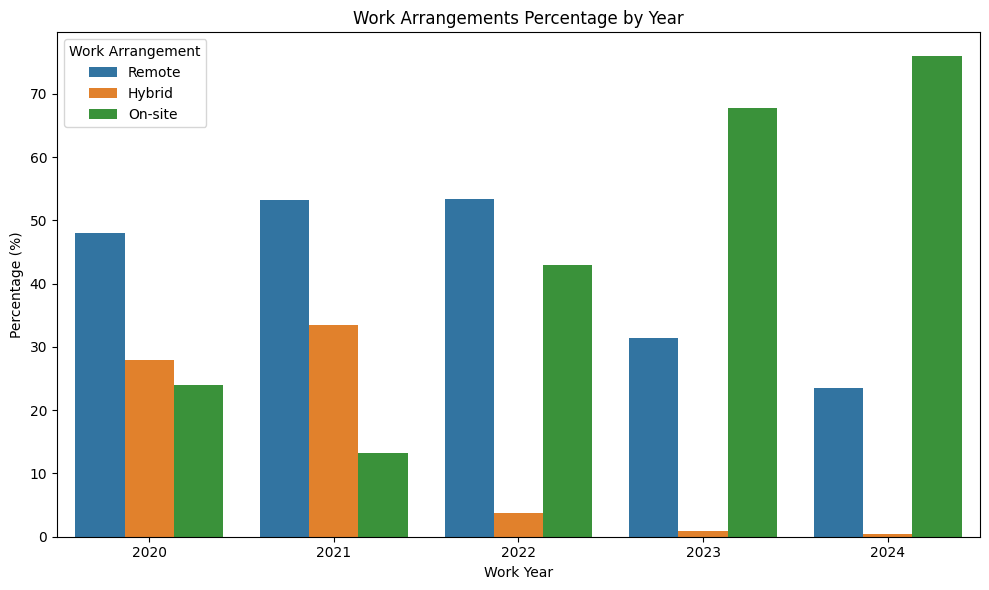

In [6]:
work_arrangements = df.groupby(['work_year', 'remote_ratio']).size().unstack()
work_arrangements.columns = ['On-site', 'Hybrid', 'Remote']
work_arrangements.head()

work_arrangements_total = work_arrangements.sum(axis=1)
work_arrangements_pct = pd.DataFrame()
for col in work_arrangements.columns:
    work_arrangements_pct[col] = work_arrangements[col] / work_arrangements_total * 100

work_arrangements_pct = work_arrangements_pct[['Remote', 'Hybrid', 'On-site']]

plot_data = work_arrangements_pct.reset_index().melt(
    id_vars=['work_year'],
    value_vars=['Remote', 'Hybrid', 'On-site'],
    var_name='Work Arrangement',
    value_name='Percentage'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='work_year', y='Percentage', hue='Work Arrangement')
plt.title('Work Arrangements Percentage by Year')
plt.xlabel('Work Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Figure X** Bar charts illustrating the proportion of remote, hybrid, and on-site work arrangements. Prior to 2021, the frequency of remote and hybrid work arrangements increased, while the frequency of on-site work arrangements declined. Conversely, in 2022, the pattern reversed, with an increase in on-site work arrangements and a subsequent decrease in remote and hybrid work arrangements. 


# Compensation by Company Size

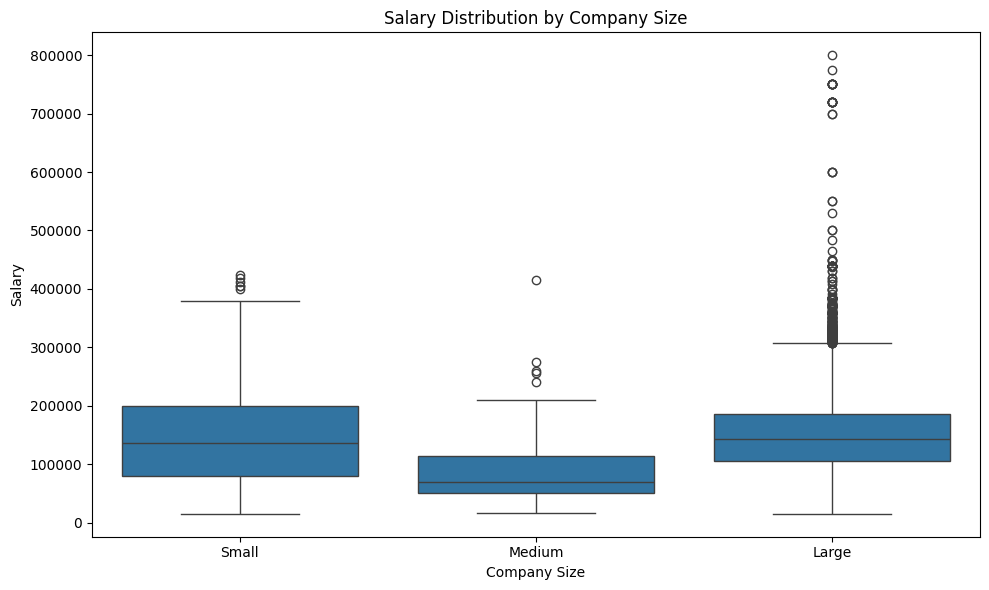

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'], rotation=0) 
plt.tight_layout()
plt.show()

**Figure X:** Box plots illustrating the salary distribution across company sizes. Notably, small and large companies exhibit similar median salaries, with large companies slightly higher. Medium companies, on the other hand, have a significantly lower median salary. Large companies appear to have a higher concentration of outliers in the upper salary ranges, with the highest annual salary recorded at 800,000 US Dollars. Small and medium-sized companies have salaries that peak at approximately 430,000 US Dollars per year.



# Summary